In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
vinos = pd.read_csv("../data/vinos_ESP.csv")
vinos

,Clase,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
0,Tinto,Viña Alcanta,2020,4764038,Tinto 2020,3.5,244,2.25,Alicante,Roble,Denominación de Origen
1,Tinto,Ayuso,2020,2084964,Abadia del Roble Tinto 2020,3.2,95,2.41,La Mancha,Roble,Denominación de Origen
2,Tinto,Faustino Rivero Ulecia,2018,5841016,Joven Tempranillo - Garnacha 2018,3.2,54,2.97,Rioja,Joven,Denominación de Origen
3,Tinto,Bodega Rochal,2019,4190807,Calixto Rufete 2019,3.2,28,2.98,Sierra de Salamanca,Roble,Vino de Calidad
4,Tinto,Cata Regia,2018,2417548,Crianza 2018,3.6,112,2.99,Terra Alta,Crianza,Denominación de Origen
...,...,...,...,...,...,...,...,...,...,...,...
9401,Espumoso,Dream Line,2020,2215552,Glaciar Premium N.V.,2.9,84,16.96,Cava,Non Vintage,Denominación de Origen
9402,Espumoso,Codorníu,2020,1180680,Cava Clasico Brut N.V.,3.5,20322,5.95,Cava,Non Vintage,Denominación de Origen
9403,Espumoso,Recaredo,2005,1479756,Turó d’en Mota 2005,4.5,171,100.00,Penedès,Sin determinar,Denominación de Origen
9404,Espumoso,Recaredo,2015,1109743,Serral del Vell Brut Nature 2015,4.5,68,36.49,Penedès,Sin determinar,Denominación de Origen


## ANÁLISIS 

In [ ]:
tablas_excel = "https://www.geeksforgeeks.org/how-to-write-pandas-dataframes-to-multiple-excel-sheets/"

####### Colores paleta seaborn
colores = "https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette"

In [88]:
sns.color_palette("viridis")

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

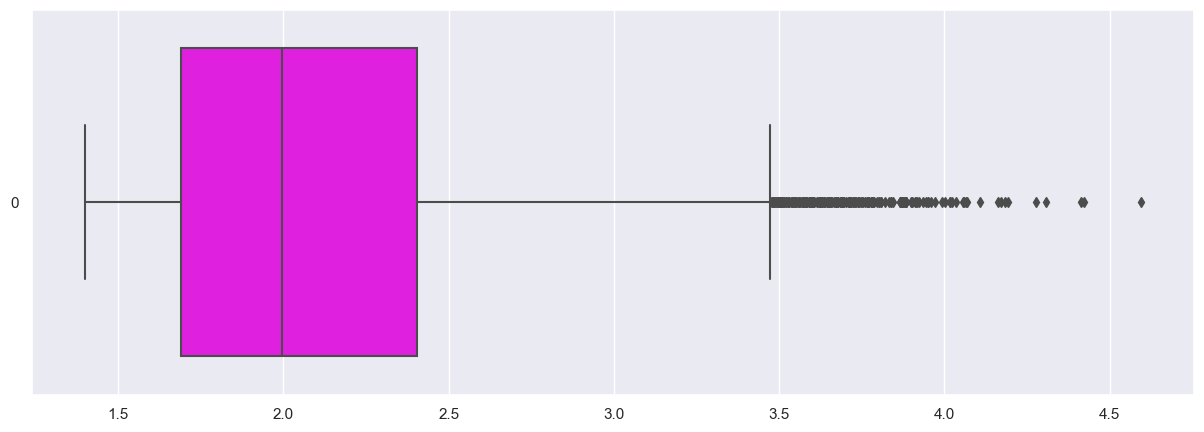

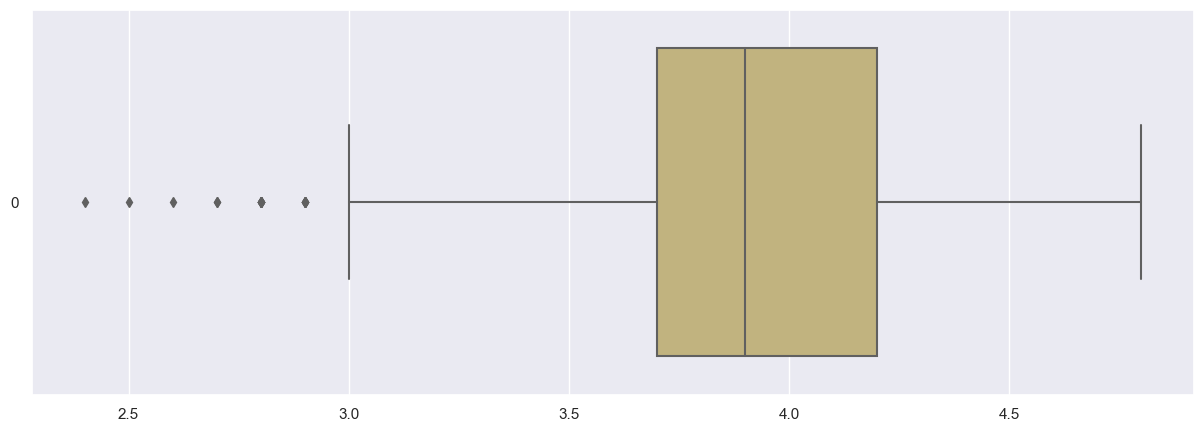

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(vinos["Rating"], color="y", orient= "h");

In [ ]:
###############################################################################################
################################### PRESENCIA EN EL MERCADO ###################################
###############################################################################################



In [21]:
clases = vinos.groupby("Clase")[["Vino"]].count().sort_values(by="Vino", ascending=False).reset_index()
clases

,Clase,Vino
0,Tinto,6453
1,Blanco,1988
2,Espumoso,618
3,Rosado,347


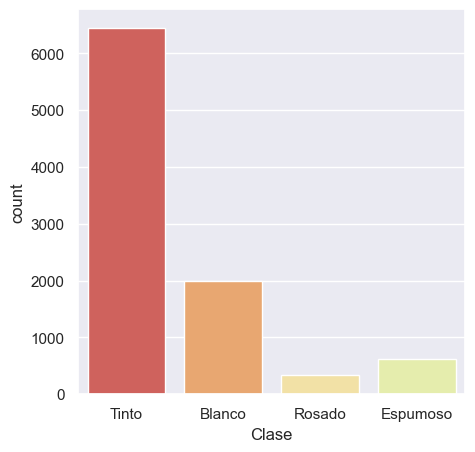

In [44]:
sns.set(palette="Spectral", color_codes=True)
plt.figure(figsize=(5,5))
sns.countplot(x=vinos["Clase"]);

In [1]:
resenas = vinos.groupby("Clase")[["Nº_reseñas"]].sum().sort_values(by="Nº_reseñas",ascending=False).reset_index()
resenas

NameError: name 'vinos' is not defined

In [28]:
df = pd.merge(clases,resenas)
df

,Clase,Vino,Nº_reseñas
0,Tinto,6453,2650183
1,Blanco,1988,337771
2,Espumoso,618,351896
3,Rosado,347,40622


In [32]:
########## OJO esta gráfica sólo en presentación para comentar la diferencia entre mdo y hábito consumo

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import matplotlib.pyplot as plt

# create trace1 
trace1 = go.Bar(x = df['Clase'],
                y = df['Vino'],
                name = 'Vinos por clase',
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                line = dict(color='rgb(0,0,0)', width = 1.5)))

trace2 = go.Bar(x = df['Clase'],
               y = df['Nº_reseñas'],
               name = 'Popularidad de cada clase',
               marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)))

data = [trace1, trace2]

layout = go.Layout(barmode = "group")

fig = go.Figure(data = data, layout = layout)

iplot(fig)

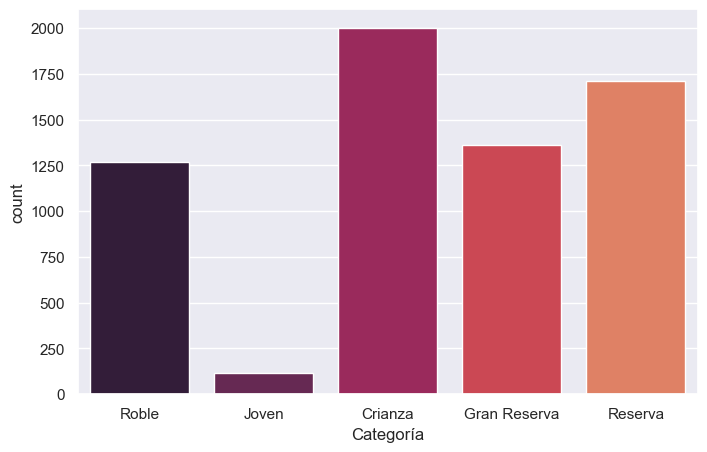

In [83]:
cat_tintos = vinos[vinos["Clase"]=="Tinto"]["Categoría"]

sns.set(palette="rocket", color_codes=True)
plt.figure(figsize=(8,5))
sns.countplot(x=cat_tintos);

In [80]:
# NO GRÁFICA, dada la gran desproporción

cat_blancos = vinos[vinos["Clase"]=="Blanco"]["Categoría"]
cat_blancos.value_counts().to_frame()


,Categoría
Sin determinar,1966
Reserva,15
Roble,3
Crianza,3
Gran Reserva,1


In [81]:
# NO GRÁFICA, dada la gran desproporción

cat_rosados = vinos[vinos["Clase"]=="Rosado"]["Categoría"]
cat_rosados.value_counts().to_frame()

,Categoría
Sin determinar,345
Gran Reserva,2


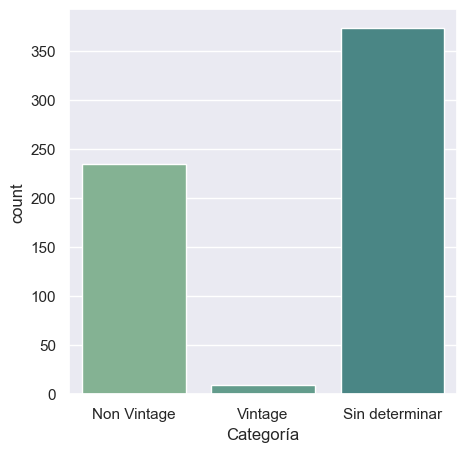

In [82]:
cat_espumosos = vinos[vinos["Clase"]=="Espumoso"]["Categoría"]

sns.set(palette="crest", color_codes=True)
plt.figure(figsize=(5,5))
sns.countplot(x=cat_espumosos);


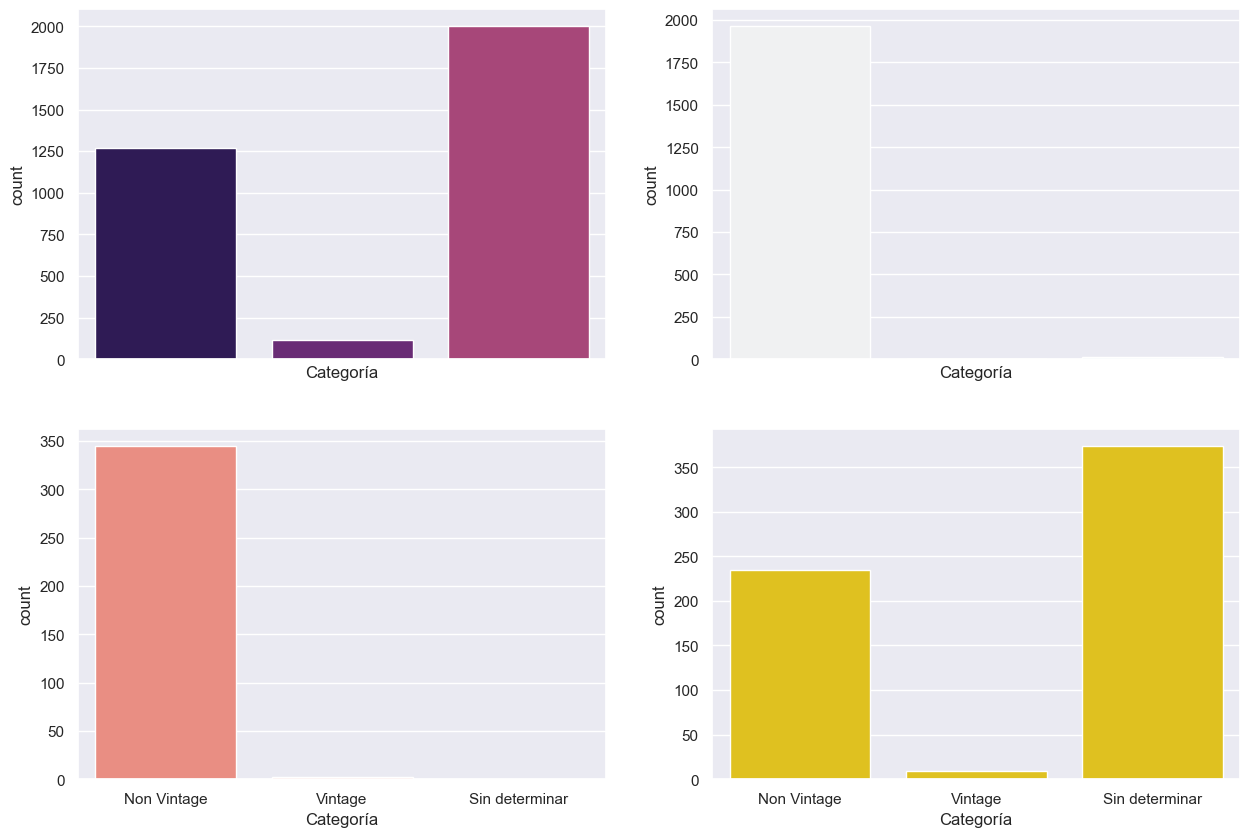

In [51]:
# ASÍ NOOOOOO, individualmente 
f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)

cat_tintos = vinos[vinos["Clase"]=="Tinto"]["Categoría"]
cat_blancos = vinos[vinos["Clase"]=="Blanco"]["Categoría"]
cat_rosados = vinos[vinos["Clase"]=="Rosado"]["Categoría"]
cat_espumosos = vinos[vinos["Clase"]=="Espumoso"]["Categoría"]

sns.countplot(x=cat_tintos , palette="magma", ax=axes[0, 0])
sns.countplot(x=cat_blancos, palette="light:b", ax=axes[0, 1])
sns.countplot(x=cat_rosados, color="salmon", ax=axes[1, 0])
sns.countplot(x=cat_espumosos, color="gold", ax=axes[1, 1]);

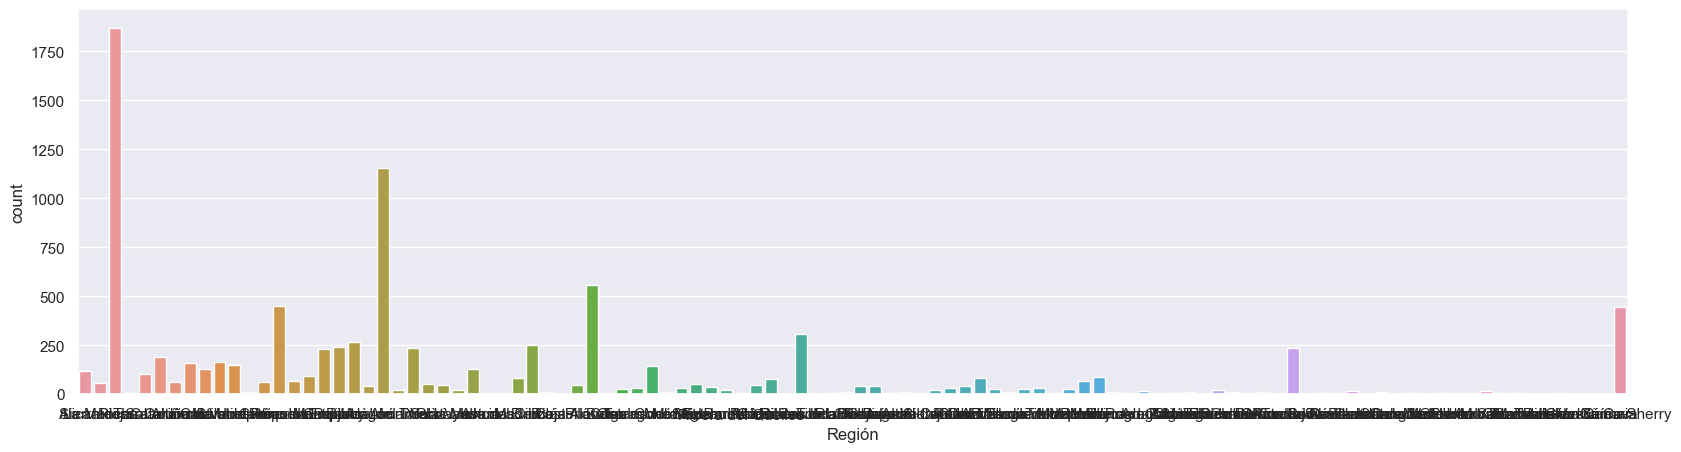

In [32]:
plt.figure(figsize=(20,5))
sns.countplot(x=vinos["Región"]);

In [44]:
vinos["Región"].value_counts(ascending=True)[-15:]

Jumilla              157
Navarra              164
Cataluña             188
Montsant             233
Toro                 235
Rías Baixas          237
Empordà              241
Bierzo               250
Castilla y León      269
Rueda                306
Cava                 447
Penedès              451
Priorato             556
Ribera del Duero    1153
Rioja               1871
Name: Región, dtype: int64

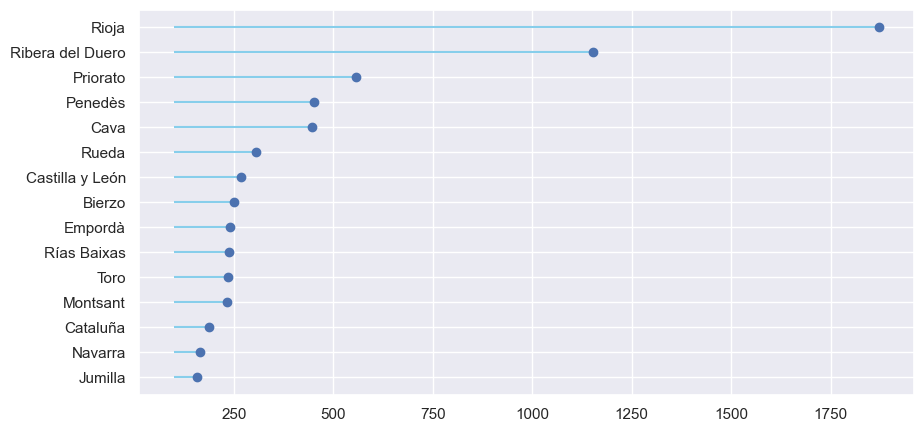

In [76]:
top15regiones = vinos["Región"].value_counts(ascending=True)[-15:]

plt.figure(figsize=(10,5))
plt.hlines(y=top15regiones.index,
           xmin=100,
           xmax=top15regiones,
           color='skyblue')
plt.plot(top15regiones, top15regiones.index, "o");

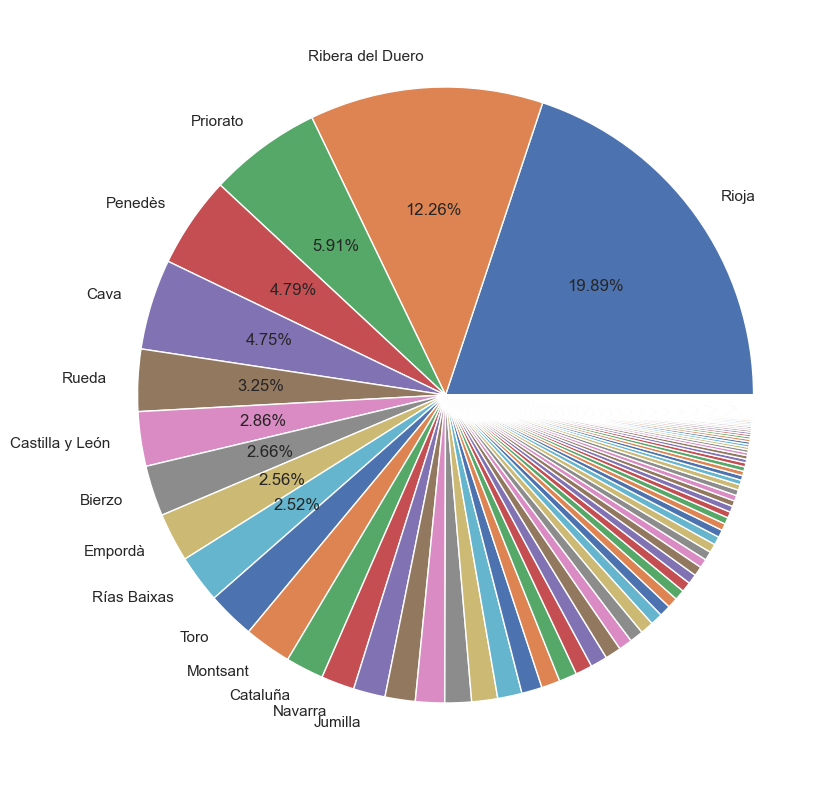

In [84]:
########################## PARTICIPACIÓN EN EL MERCADO ###########################

data = vinos["Región"].value_counts()

def my_labels(sizes,labels):
        etiquetas = [label if size>156 else "" for size,label in zip(sizes,labels)]
        return etiquetas

plt.figure(figsize=(10,10))
plt.pie(data.values,
        labels=my_labels(data.values,data.index),
        autopct= lambda pct:("%.2f%%" %pct) if pct>2.50 else "");

In [11]:
##################################### BODEGAS #######################################
vinos.Bodega.value_counts()

Familia Torres       96
Marqués de Riscal    71
Bodegas Faustino     54
Castillo Perelada    54
Artadi               54
                     ..
Dominio de Lázaro     1
Oráculo               1
Dominio de Loalva     1
Celler Cal Bessó      1
Bocchoris             1
Name: Bodega, Length: 1666, dtype: int64

In [13]:
vinos.groupby("Bodega")[["Nº_reseñas"]].sum().sort_values(by="Nº_reseñas", ascending=False)

,Nº_reseñas
Bodega,
Marqués de Riscal,111163
Vega Sicilia,82344
Muga,80113
Familia Torres,78051
Félix Solís,77023
...,...
Poesia,25
Selva Vins,25
Vidas,25


In [22]:
vinos.groupby(["Bodega","Clase"])[["Rating", "Precio"]].median().sort_values(by="Rating", ascending=False)

,,Rating,Precio
Bodega,Clase,,
Bodegas El Nido,Tinto,4.7,137.250000
Vega Sicilia,Tinto,4.7,287.700000
La Legua,Tinto,4.6,31.524180
Alto Moncayo,Tinto,4.5,73.200000
Pago de Carraovejas,Tinto,4.5,91.807231
...,...,...,...
Dubois,Espumoso,2.8,2.900000
Santa Margarita,Espumoso,2.7,10.250000
Portell - Vinícola de Sarral,Blanco,2.6,4.540000


In [18]:
vinos.groupby("Bodega")[["Nº_reseñas","Rating"]].aggregate([sum,np.median]).sort_values(by=("Nº_reseñas", "sum"), ascending=False)

Nº_reseñas         Rating       
                         sum  median    sum median
Bodega                                            
Marqués de Riscal     111163   270.0  285.2    4.0
Vega Sicilia           82344  1222.5  176.9    4.7
Muga                   80113   641.0  220.0    4.1
Familia Torres         78051   284.5  373.2    3.9
Félix Solís            77023   476.0   62.7    3.8
...                      ...     ...    ...    ...
Poesia                    25    25.0    3.0    3.0
Selva Vins                25    25.0    3.9    3.9
Vidas                     25    25.0    3.8    3.8
Rendé Masdéu              25    25.0    3.5    3.5
Valdespino                25    25.0    3.3    3.3

[1666 rows x 4 columns]

In [10]:
vinos[vinos.Bodega == "Familia Torres"].groupby("Clase").get_group("Tinto")

,Clase,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
253,Tinto,Familia Torres,2020,1385210,Sangre de Toro 2020,3.3,324,5.180000,Cataluña,Roble,Denominación de Origen
281,Tinto,Familia Torres,2019,1152206,Coronas Crianza 2019,3.7,230,5.490000,Cataluña,Crianza,Denominación de Origen
312,Tinto,Familia Torres,2019,1385210,Sangre de Toro 2019,3.1,435,5.650000,Cataluña,Roble,Denominación de Origen
401,Tinto,Familia Torres,2017,3385833,Mas Rabell 2017,3.7,1190,6.050000,Cataluña,Crianza,Denominación de Origen
521,Tinto,Familia Torres,2017,1147949,Coronas Tempranillo 2017,3.6,3256,6.750000,Cataluña,Crianza,Denominación de Origen
523,Tinto,Familia Torres,2019,1147949,Coronas Tempranillo 2019,3.5,758,6.750000,Cataluña,Roble,Denominación de Origen
609,Tinto,Familia Torres,2018,1152206,Coronas Crianza 2018,3.6,175,6.960000,Cataluña,Crianza,Denominación de Origen
732,Tinto,Familia Torres,2013,3129085,Gran Coronas Reserva Cabernet Sauvignon 2013,3.7,4667,7.618333,Penedès,Reserva,Denominación de Origen
1334,Tinto,Familia Torres,2018,2651,Atrium Merlot 2018,3.7,835,9.950000,Penedès,Crianza,Denominación de Origen
1348,Tinto,Familia Torres,2020,7667938,Vinyarets 2020,3.6,78,10.000000,Penedès,Roble,Denominación de Origen


In [ ]:
# Para agrupar los pequeños en una sola porción de "Otros"

''' 
df= pd.DataFrame([["potatoes",20],["carots",39], ["tomatos",40], ["apples",2], ["bananas",2]] , columns = ["aliments","number"])  

df_draw = df.copy()
df_draw.loc[df_draw['number'] < 20, 'aliments'] = 'vegetables'

df_draw = df_draw.groupby('aliments')['number'].sum().reset_index()

plt.pie(df_draw['number'], labels=df_draw['aliments'], autopct='%.0f%%');

'''

In [60]:
vinos["Región"].unique()

array(['Alicante', 'La Mancha', 'Rioja', 'Sierra de Salamanca',
       'Terra Alta', 'Cataluña', 'Cariñena', 'Jumilla', 'Castilla',
       'Navarra', 'Somontano', 'Valdepeñas', 'Utiel-Requena', 'Penedès',
       'Campo de Borja', 'Vino de España', 'Montsant', 'Empordà',
       'Castilla y León', 'Aragón', 'Ribera del Duero', 'Almansa', 'Toro',
       'Yecla', 'Calatayud', 'Plà i Llevant', 'Valencia', 'Asturias',
       'Valle del Cinca', 'Madrid', 'Bierzo', 'Uclés', 'Castelló',
       'Rioja Alavesa', 'Priorato', 'Bullas', 'Cigales', 'Tarragona',
       'Costers del Segre', 'Murcia', 'Méntrida', 'Conca de Barberà',
       'Manchuela', 'Extremadura', 'Ribera del Queiles', 'Cádiz',
       'Valdeorras', 'Ribera del Júcar', 'Rueda', 'Ribera del Jiloca',
       'Ribera del Guadiana', 'Tierra de León', 'Pla de Bages',
       'Rioja Alta', 'Arlanza', 'Dehesa del Carrizal',
       'Campo de la Guardia', 'Valdejalón', 'Alella', 'Sierras de Málaga',
       'Ribeira Sacra', 'Andalucía', 'El Terre

In [52]:
######################################################################################
###################################### POPULARIDAD ###################################
######################################################################################

'''Vamos a intentar analizar la popularidad partiendo de datos objetivos para llegar
    a una valoración subjetiva '''

vinos.groupby(["Región"])[["Nº_reseñas"]].sum().sort_values(by= "Nº_reseñas",ascending=False)[:26].reset_index()

,Región,Nº_reseñas
0,Rioja,1066352
1,Ribera del Duero,656840
2,Cava,297777
3,Priorato,133775
4,Toro,121899
5,Penedès,76438
6,Castilla y León,68584
7,Rueda,66062
8,Rías Baixas,64371
9,Jumilla,62177


In [57]:
pop_calidad = vinos.groupby(["Sello_calidad", "Región"])[["Nº_reseñas"]].sum().sort_values(by= "Nº_reseñas",ascending=False)
pop_calidad.groupby("Sello_calidad").get_group("Denominación de Origen")[:10]

Nº_reseñas
Sello_calidad          Región                      
Denominación de Origen Rioja                1066352
                       Ribera del Duero      656840
                       Cava                  297777
                       Priorato              133775
                       Toro                  121899
                       Penedès                76438
                       Rueda                  66062
                       Rías Baixas            64371
                       Jumilla                62177
                       Cataluña               54693

In [18]:
vinos.groupby("Clase")["Nº_reseñas"].aggregate([sum,min,max,np.mean,np.median])

,sum,min,max,mean,median
Clase,,,,,
Blanco,337771,25,9352,169.904930,75.0
Espumoso,351896,25,20322,569.411003,116.0
Rosado,40622,25,961,117.066282,64.0
Tinto,2650183,25,39460,410.690067,112.0


In [85]:
populares = vinos.groupby(["Clase","Región"])["Nº_reseñas"].aggregate([sum,min,max,np.mean,np.median]).sort_values(by="sum", ascending=False)
populares[:15]


sum  min    max        mean  median
Clase    Región                                                   
Tinto    Rioja             1031119   25  26492  642.842269   159.5
         Ribera del Duero   653682   25   8788  584.166220   152.0
Espumoso Cava               297777   25  20322  666.167785   129.0
Tinto    Priorato           130513   25   4231  254.908203   107.0
         Toro               121757   25   7967  524.814655   126.5
Blanco   Rueda               65407   25   5523  218.023333    96.5
Tinto    Jumilla             61091   25   5503  427.209790   133.0
Blanco   Rías Baixas         60769   25   4253  281.337963    98.5
Tinto    Vino de España      55569   32  39460  910.967213   129.0
         Castilla y León     50585   25   4325  285.790960   106.0
         Bierzo              44047   25   3310  218.054455    96.0
         Penedès             36704   25   4946  249.687075    68.0
         Montsant            30579   25   1809  155.223350    87.0
Blanco   Cataluña            23856   25   7478  418.526316    66.0
         Penedès             23290   25   1147  120.051546    70.0

In [15]:
mercados_clase = vinos.groupby(["Clase","Región"])[["Vino"]].count().sort_values(by="Vino",ascending=False)
mercados_clase.groupby("Clase").get_group("Tinto")[:20]

Vino
Clase Región                 
Tinto Rioja              1604
      Ribera del Duero   1119
      Priorato            512
      Toro                232
      Bierzo              202
      Montsant            197
      Castilla y León     177
      Empordà             154
      Penedès             147
      Jumilla             143
      Navarra              98
      Somontano            94
      Castilla             88
      Valencia             86
      Costers del Segre    85
      Alicante             82
      Cataluña             78
      Madrid               73
      Ribeira Sacra        69
      Mallorca             68

In [51]:
populares.groupby("Clase").get_group("Tinto")[:20]

sum  min    max         mean  median
Clase Región                                                    
Tinto Rioja             1031119   25  26492   642.842269   159.5
      Ribera del Duero   653682   25   8788   584.166220   152.0
      Priorato           130513   25   4231   254.908203   107.0
      Toro               121757   25   7967   524.814655   126.5
      Jumilla             61091   25   5503   427.209790   133.0
      Vino de España      55569   32  39460   910.967213   129.0
      Castilla y León     50585   25   4325   285.790960   106.0
      Bierzo              44047   25   3310   218.054455    96.0
      Penedès             36704   25   4946   249.687075    68.0
      Montsant            30579   25   1809   155.223350    87.0
      Campo de Borja      22819   25   2483   393.431034   134.0
      Alicante            22423   25   6123   273.451220   125.0
      Valdepeñas          22187   43  15210  2017.000000   157.0
      Sardón de Duero     21031   33   7637  1106.894737   241.0
      Somontano           19402   26   1225   206.404255   120.0
      Rioja Alavesa       18196   28   5922   454.900000    85.0
      Empordà             18174   25   1649   118.012987    66.5
      Yecla               17267   29   3756   383.711111   185.0
      Castilla            16879   25    996   191.806818   118.5
      Rioja Alta          14608   25   3032   456.500000   114.0

In [20]:
vinos.groupby("Clase")["Vino","Bodega","Nº_reseñas","Rating","Región"].get_group("Tinto").sort_values(by="Nº_reseñas",ascending=False)[:10]

,Vino,Bodega,Nº_reseñas,Rating,Región
279,Mucho Más Tinto N.V.,Félix Solís,39460,4.2,Vino de España
3035,Rioja Reserva 2015,Marqués de Riscal,26492,4.1,Rioja
4972,Rioja Reserva 2014,Marqués de Riscal,25925,4.1,Rioja
92,The Guv’nor N.V.,Félix Solís,15210,4.0,Valdepeñas
1561,Tempranillo 2016,Campo Viejo,14484,3.7,Rioja
6424,I Gran Reserva 2001,Bodegas Faustino,11738,4.0,Rioja
1577,Tempranillo 2018,Campo Viejo,11667,3.7,Rioja
3345,Finca Monasterio Rioja 2016,Baron de Ley,11462,4.1,Rioja
3034,Crianza 2016,Cune (CVNE),11378,3.6,Rioja
3646,I Gran Reserva 2008,Bodegas Faustino,10840,4.0,Rioja


In [13]:
vinos.sort_values(by="Nº_reseñas",ascending=False)[:20]

,Clase,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
279,Tinto,Félix Solís,2020,6266660,Mucho Más Tinto N.V.,4.2,39460,5.48,Vino de España,Roble,Sin denominación
3035,Tinto,Marqués de Riscal,2015,1163903,Rioja Reserva 2015,4.1,26492,17.00,Rioja,Reserva,Denominación de Origen
4972,Tinto,Marqués de Riscal,2014,1163903,Rioja Reserva 2014,4.1,25925,21.00,Rioja,Reserva,Denominación de Origen
9402,Espumoso,Codorníu,2020,1180680,Cava Clasico Brut N.V.,3.5,20322,5.95,Cava,Non Vintage,Denominación de Origen
8860,Espumoso,Freixenet,2020,1135811,Cava Cordón Negro Brut N.V.,3.6,18970,6.72,Cava,Non Vintage,Denominación de Origen
9100,Espumoso,Segura Viudas,2020,5063,Cava Reserva Heredad Brut,3.9,15594,17.90,Cava,Sin determinar,Denominación de Origen
92,Tinto,Félix Solís,2020,5445838,The Guv’nor N.V.,4.0,15210,4.99,Valdepeñas,Roble,Denominación de Origen
8831,Espumoso,Freixenet,2020,1141122,Cava Carta Nevada Brut N.V.,3.6,14890,5.95,Cava,Non Vintage,Denominación de Origen
1561,Tinto,Campo Viejo,2016,1133198,Tempranillo 2016,3.7,14484,10.95,Rioja,Reserva,Denominación de Origen
9034,Espumoso,Muga,2020,2696113,Conde de Haro Brut N.V.,4.0,12783,13.90,Cava,Non Vintage,Denominación de Origen


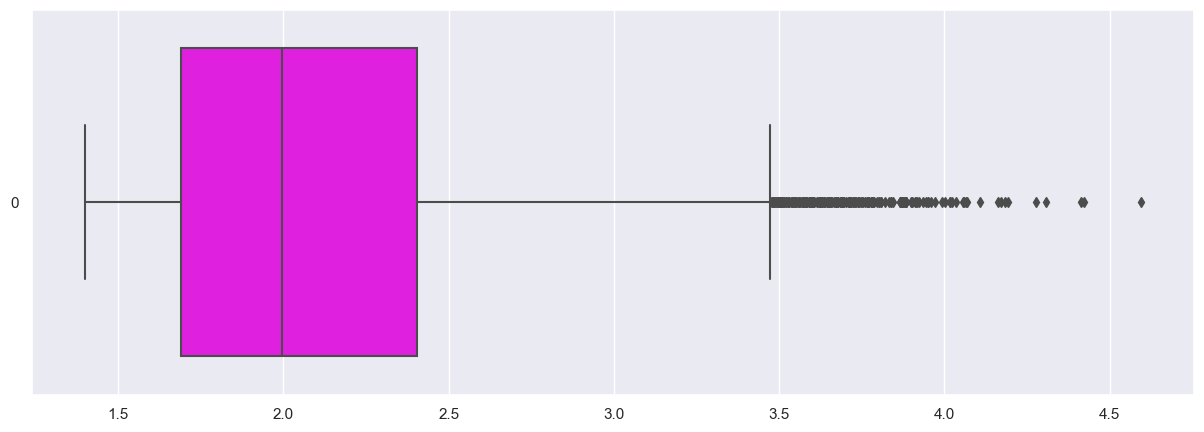

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(np.log10(vinos["Nº_reseñas"]), color="magenta", orient= "h");

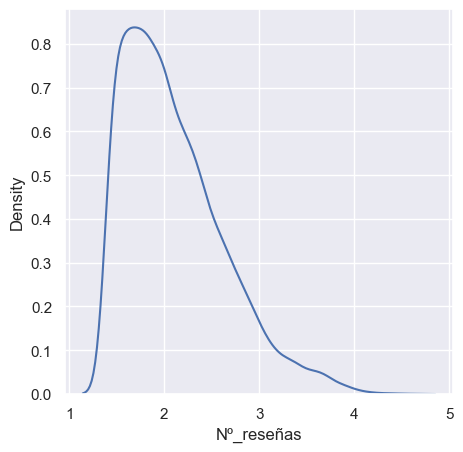

In [20]:
plt.figure(figsize=(5,5))
sns.kdeplot(np.log10(vinos["Nº_reseñas"]));

In [18]:
vinos[["Nº_reseñas"]].describe()

,Nº_reseñas
count,9406.000000
mean,359.395280
std,1102.458493
min,25.000000
25%,49.000000
50%,99.000000
75%,254.000000
max,39460.000000


In [50]:
q1_res = vinos["Nº_reseñas"].describe()[4]
q2_res = vinos["Nº_reseñas"].describe()[5]
q3_res = vinos["Nº_reseñas"].describe()[6]
IQRpopularidad = q3_res - q1_res

In [106]:
vinos.groupby("Clase")["Nº_reseñas"].describe()

,count,mean,std,min,25%,50%,75%,max
Clase,,,,,,,,
Blanco,1988.0,169.904930,421.646005,25.0,41.00,75.0,154.00,9352.0
Espumoso,618.0,569.411003,1793.892506,25.0,50.25,116.0,346.25,20322.0
Rosado,347.0,117.066282,144.606757,25.0,38.00,64.0,122.00,961.0
Tinto,6453.0,410.690067,1177.711201,25.0,53.00,112.0,306.00,39460.0


In [51]:
'''Vemos que hay muchísimos outliers dando justificación a la dispersión observada con la desviación típica.
    por ello será mejor analizar la popularidad/fama por región y bodega'''
outliers_pop = q3_res + (1.5*IQRpopularidad)
vinos[vinos["Nº_reseñas"]>outliers_pop].sort_values(by="Nº_reseñas", ascending=False)

,Clase,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
279,Tinto,Félix Solís,2020,6266660,Mucho Más Tinto N.V.,4.2,39460,5.48,Vino de España,Roble,Sin denominación
3035,Tinto,Marqués de Riscal,2015,1163903,Rioja Reserva 2015,4.1,26492,17.00,Rioja,Reserva,Denominación de Origen
4972,Tinto,Marqués de Riscal,2014,1163903,Rioja Reserva 2014,4.1,25925,21.00,Rioja,Reserva,Denominación de Origen
9402,Espumoso,Codorníu,2020,1180680,Cava Clasico Brut N.V.,3.5,20322,5.95,Cava,Non Vintage,Denominación de Origen
8860,Espumoso,Freixenet,2020,1135811,Cava Cordón Negro Brut N.V.,3.6,18970,6.72,Cava,Non Vintage,Denominación de Origen
...,...,...,...,...,...,...,...,...,...,...,...
9226,Espumoso,Agusti Torello Mata,2016,1174061,Cava Reserva Brut 2016,3.8,563,10.95,Cava,Sin determinar,Denominación de Origen
6487,Blanco,Freixenet,2019,1583328,Mia Blanco 2019,3.4,563,4.40,Penedès,Sin determinar,Denominación de Origen
3492,Tinto,Juvé & Camps,2017,7682749,Pagos de Anguix Diez Meses en Barrica 2017,4.1,563,21.95,Ribera del Duero,Crianza,Denominación de Origen
8099,Blanco,Dominio de la Granadilla,2020,6417152,Sauvignon Blanc 2020,3.8,562,9.95,Rueda,Sin determinar,Denominación de Origen


In [17]:
vinos.groupby(["Bodega","Región"])[["Nº_reseñas"]].sum().sort_values(by="Nº_reseñas",ascending=False).reset_index()[:10]

,Bodega,Región,Nº_reseñas
0,Marqués de Riscal,Rioja,96902
1,Vega Sicilia,Ribera del Duero,82344
2,Bodegas Faustino,Rioja,67262
3,Muga,Rioja,66867
4,La Rioja Alta,Rioja,66745
5,Campo Viejo,Rioja,54636
6,Freixenet,Cava,54619
7,Dominio de Pingus,Ribera del Duero,52987
8,Marqués de Murrieta,Rioja,52925
9,Pintia,Toro,47263


In [4]:
########################################################################################################
############################################ CALIDAD ###################################################
########################################################################################################

''' El siguiente factor a analizar será la calidad.
    Para ello, nos apoyaremos en el rating que poseen los vinos en la web Vivino'''

' El siguiente factor a analizar será la calidad.\n    Para ello, nos apoyaremos en el rating que poseen los vinos en la web Vivino'

In [46]:
vinos[["Rating"]].describe()

,Rating
count,9406.000000
mean,3.942515
std,0.306521
min,2.400000
25%,3.700000
50%,3.900000
75%,4.200000
max,4.800000


In [48]:
q1 = vinos.Rating.describe()[4]
q2 = vinos.Rating.describe()[5]
q3 = vinos.Rating.describe()[6]
IQRrating = q3 - q1


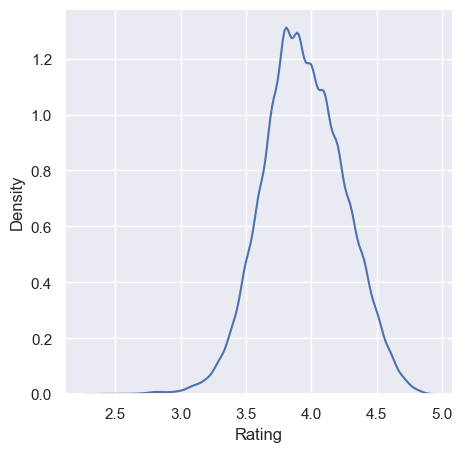

In [5]:
# Distribución de densidad del rating de todos los vinos
plt.figure(figsize=(5,5))
sns.kdeplot(vinos["Rating"]);

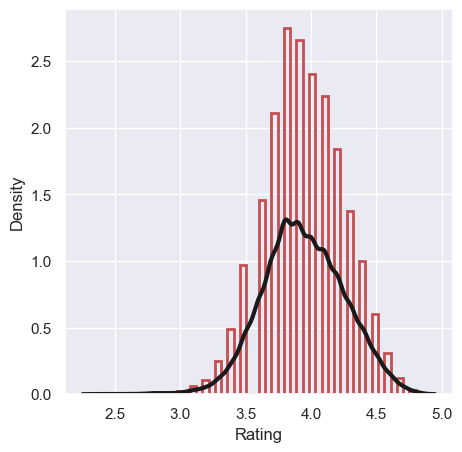

In [32]:
plt.figure(figsize=(5,5))
sns.distplot(vinos["Rating"],
             kde_kws={"color": "k", "lw":3, "label":"KDE"},
             hist_kws={"histtype": "step", "linewidth":2, "alpha":1, "color":"r"});

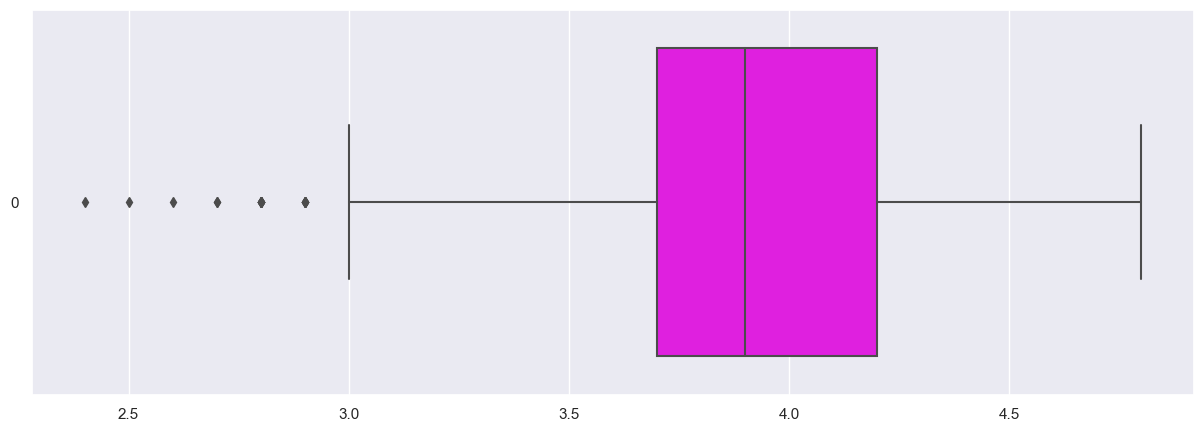

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(vinos["Rating"], color="magenta", orient= "h");

In [58]:
'''Al contrario de lo que ocurría con las reseñas, los outliers por rating son por debajo del mínimo
    y, además, son muy pocos.
    
    Debido a la importancia de esta variable, esto funcionará como un filtro directo:
        --> se descartarán todos los vinos que no superen el corte'''
outliers_calidad = q1 - (1.5*IQRrating)
len(vinos[vinos["Rating"]<outliers_calidad])
filtro_cal = vinos.copy()
filtro_cal = filtro_cal[vinos.Rating>outliers_calidad]
filtro_cal.head()

,Clase,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
0,Tinto,Viña Alcanta,2020,4764038,Tinto 2020,3.5,244,2.25,Alicante,Roble,Denominación de Origen
1,Tinto,Ayuso,2020,2084964,Abadia del Roble Tinto 2020,3.2,95,2.41,La Mancha,Roble,Denominación de Origen
2,Tinto,Faustino Rivero Ulecia,2018,5841016,Joven Tempranillo - Garnacha 2018,3.2,54,2.97,Rioja,Joven,Denominación de Origen
3,Tinto,Bodega Rochal,2019,4190807,Calixto Rufete 2019,3.2,28,2.98,Sierra de Salamanca,Roble,Vino de Calidad
4,Tinto,Cata Regia,2018,2417548,Crianza 2018,3.6,112,2.99,Terra Alta,Crianza,Denominación de Origen


In [99]:
########### Desagregación por clases de vino:
filtro_cal.groupby("Clase")["Rating"].describe()


,count,mean,std,min,25%,50%,75%,max
Clase,,,,,,,,
Blanco,1983.0,3.870802,0.245956,3.0,3.7,3.9,4.0,4.7
Espumoso,614.0,3.804723,0.290290,3.0,3.6,3.8,4.0,4.7
Rosado,347.0,3.722190,0.251809,3.0,3.5,3.7,3.9,4.4
Tinto,6443.0,3.993031,0.307390,3.0,3.8,4.0,4.2,4.8


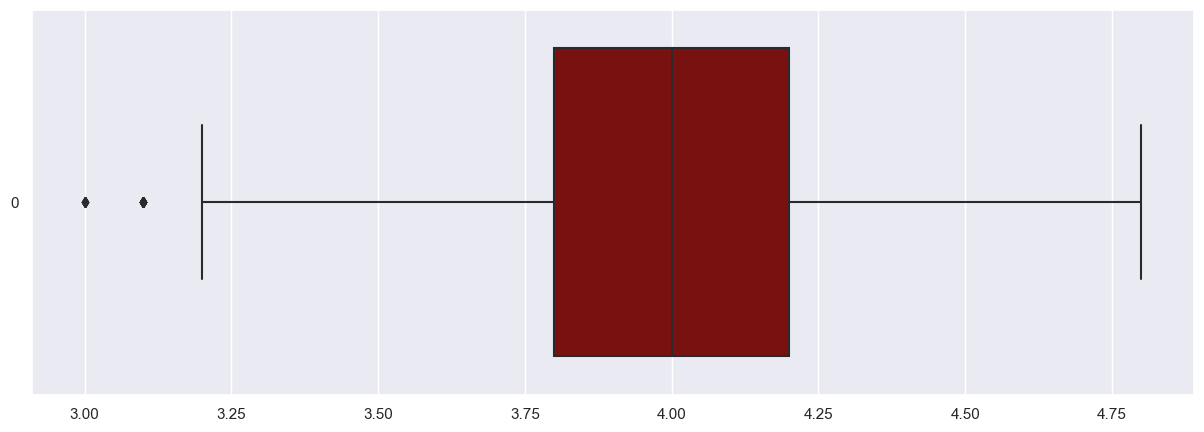

In [101]:
plt.figure(figsize=(15,5))
sns.boxplot(filtro_cal[filtro_cal.Clase=="Tinto"]["Rating"], color="darkred", orient= "h");

In [41]:
######## CORRELACIÓN
'''Habrá que analizar si guarda alguna relación el rating con otras variables: 
        -> Clase
        -> Categoría
        -> Denominación
    
    Por otra parte, también tendremos que ver cuáles son las bodegas y regiones más valoradas'''

3.9

<Figure size 1000x500 with 0 Axes>

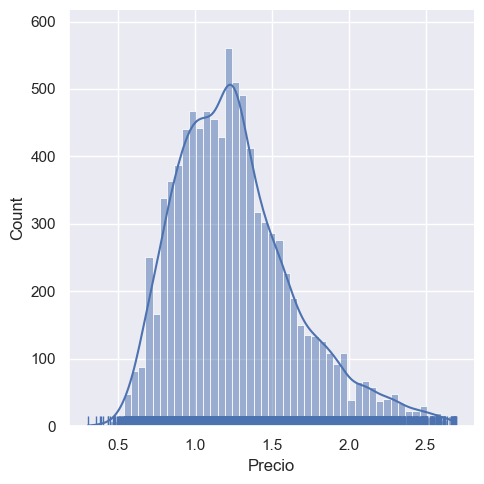

In [75]:
#########################################################################################################
##########################################  PRECIO  #####################################################
#########################################################################################################

''' Por último, tratamos el último factor determinante en nuestro análisis de vino: el precio.

    Evidentemente, existen muchas maneras de analizar el precio a la hora de valorar un vino;
    por tanto empezaremos viendo la distribución de densidad en global, así como las distribuciones de precios
    para cada clase de vino.'''

plt.figure(figsize=(10,5))
sns.displot(np.log10(vinos["Precio"]),kde=True,rug=True);

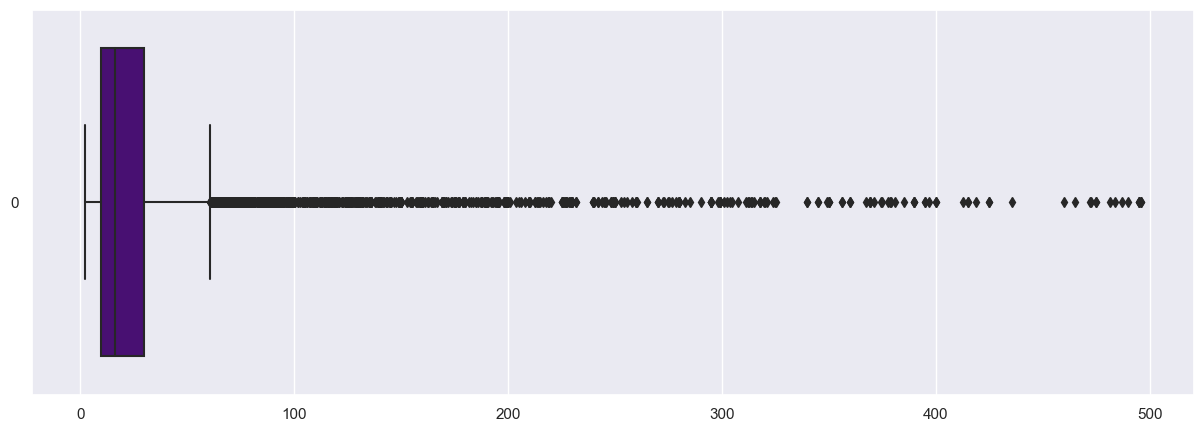

In [62]:
plt.figure(figsize=(15,5))
sns.boxplot(vinos["Precio"], color="indigo", orient= "h");

In [64]:
vinos[["Precio"]].describe()

,Precio
count,9406.000000
mean,31.026018
std,48.937586
min,2.000000
25%,9.482500
50%,16.250000
75%,29.900000
max,496.100000


In [66]:
# Desagregación de precio por clase de vino
vinos.groupby("Clase")["Precio"].describe()

,count,mean,std,min,25%,50%,75%,max
Clase,,,,,,,,
Blanco,1988.0,15.850401,17.959484,2.72,7.9000,11.50,17.5000,295.0
Espumoso,618.0,17.810431,18.722684,2.71,8.0125,12.68,18.9875,145.2
Rosado,347.0,11.640056,20.348666,2.44,5.9500,7.90,11.9450,350.0
Tinto,6453.0,38.009326,56.384952,2.00,11.2500,19.60,37.3400,496.1


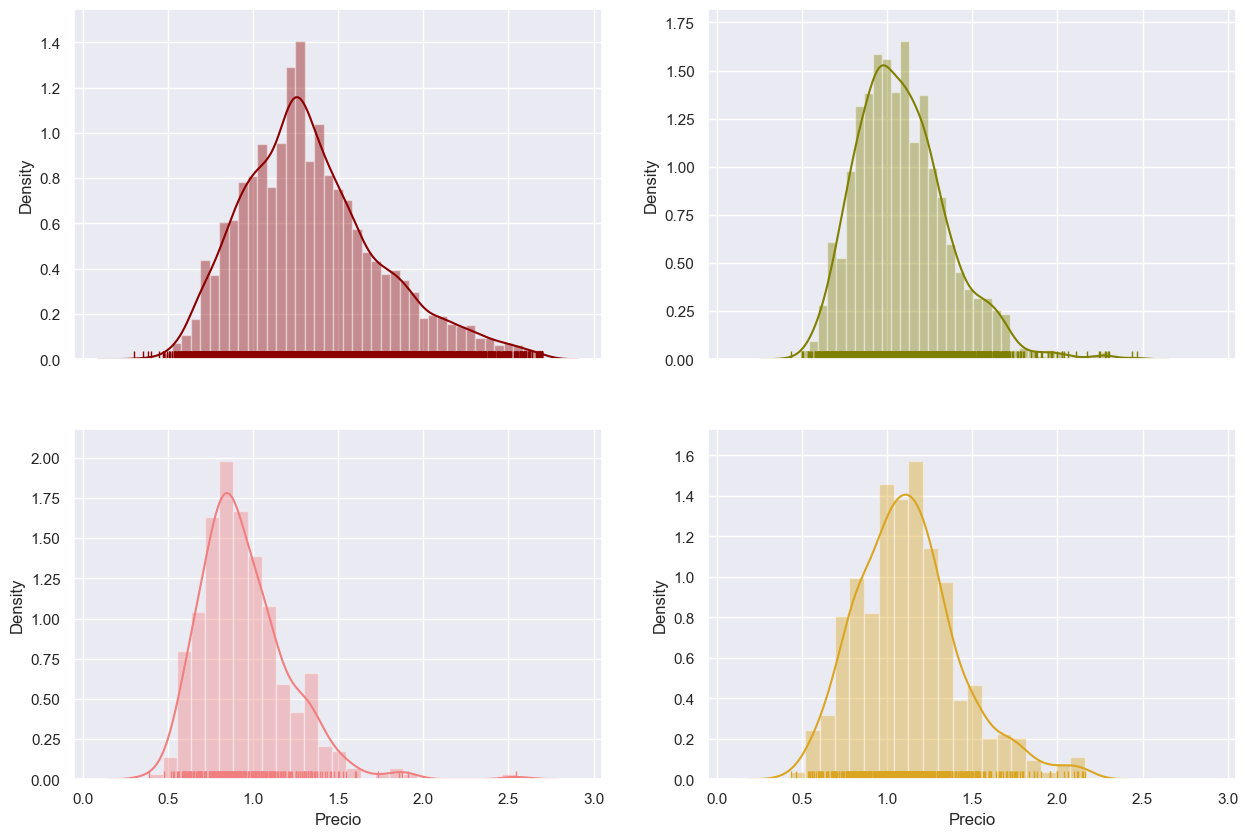

In [73]:
f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)
sns.distplot(np.log10(vinos[vinos.Clase == "Tinto"]["Precio"]), color="darkred",rug=True, ax=axes[0, 0])
sns.distplot(np.log10(vinos[vinos.Clase == "Blanco"]["Precio"]), color="olive",rug=True, ax=axes[0, 1])
sns.distplot(np.log10(vinos[vinos.Clase == "Rosado"]["Precio"]), color="lightcoral",rug=True, ax=axes[1, 0])
sns.distplot(np.log10(vinos[vinos.Clase == "Espumoso"]["Precio"]), color="goldenrod",rug=True, ax=axes[1, 1]);

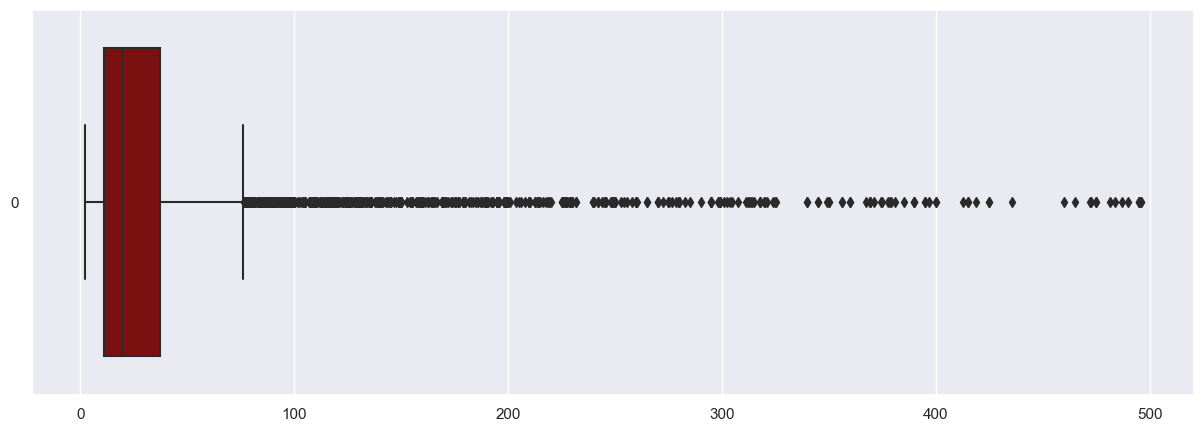

In [76]:
plt.figure(figsize=(15,5))
sns.boxplot(vinos[vinos.Clase == "Tinto"]["Precio"], color="darkred", orient= "h");

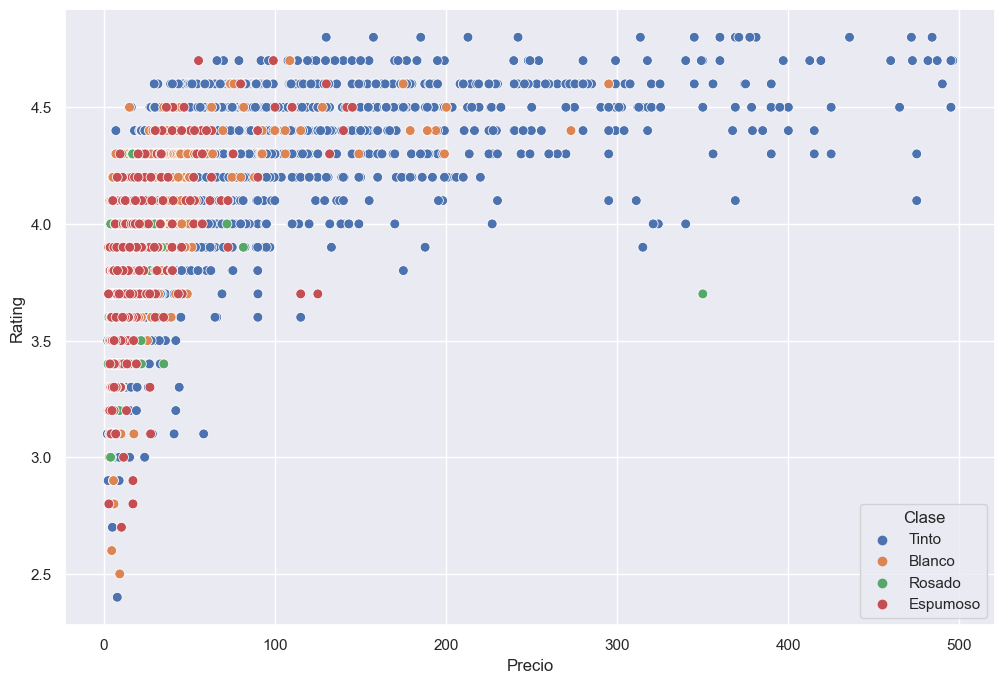

In [89]:
# Vamos a relacionar el precio con el rating según el tipo de vino
plt.figure(figsize=(12,8))
sns.scatterplot(x = vinos["Precio"],
y = vinos["Rating"],
s = 50,
hue = vinos["Clase"]);

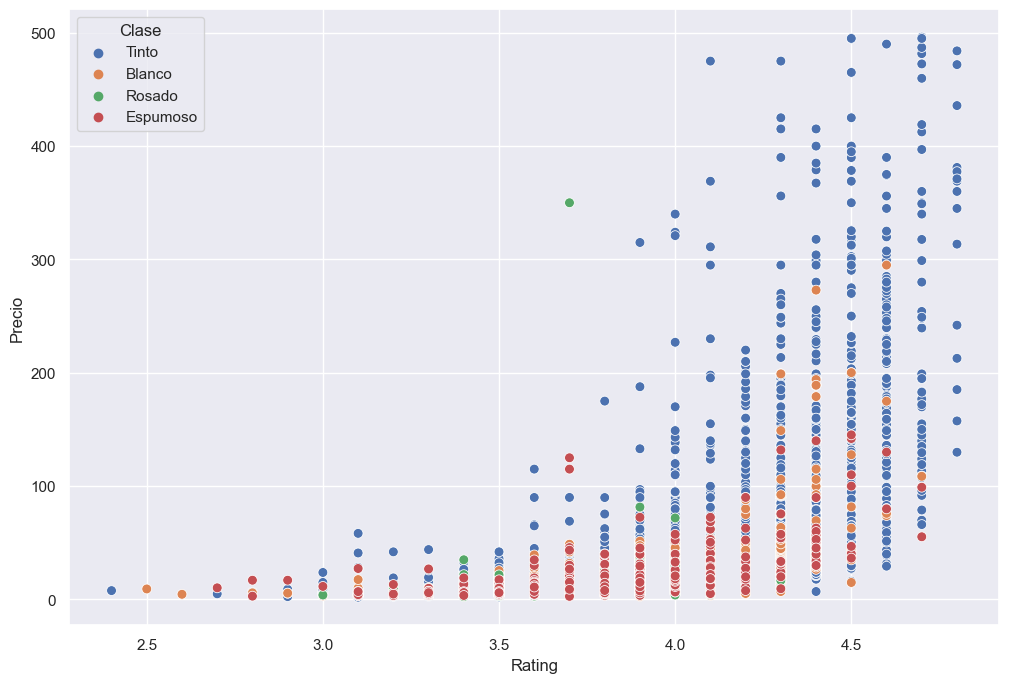

In [90]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = vinos["Rating"],
y = vinos["Precio"],
s = 50,
hue = vinos["Clase"]);

In [93]:
import numpy as np
import pandas as pd


# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go   ###### go ###### es para gráficos dinámicos

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [104]:
# prepare data frames
dftinto = vinos[vinos.Clase == "Tinto"]
dfblanco = vinos[vinos.Clase == "Blanco"]
dfrosado = vinos[vinos.Clase == "Rosado"]
dfespumoso = vinos[vinos.Clase == "Espumoso"]

# import graph objects as "go"
import plotly.graph_objs as go

# creating trace1
trace1 =go.Scatter(
                    x = dftinto.Rating,
                    y = dftinto.Precio,
                    mode = "markers",
                    name = "Tinto",
                    marker = dict(color = 'rgba(109, 33, 33, 1)'),
                    text= dftinto.Vino)

trace2 =go.Scatter(
                    x = dfblanco.Rating,
                    y = dfblanco.Precio,
                    mode = "markers",
                    name = "Blanco",
                    marker = dict(color = 'rgba(224, 253, 129, 1)'),
                    text= dfblanco.Vino)

# creating trace3
trace3 =go.Scatter(
                    x = dfrosado.Rating,
                    y = dfrosado.Precio,
                    mode = "markers",
                    name = "Rosado",
                    marker = dict(color = 'rgba(253, 129, 166, 1)'),
                    text= dfrosado.Vino)

trace4 =go.Scatter(
                    x = dfespumoso.Rating,
                    y = dfespumoso.Precio,
                    mode = "markers",
                    name = "Espumoso",
                    marker = dict(color = 'rgba(129, 180, 253, 1)'),
                    text= dfespumoso.Vino)

data = [trace1, trace2, trace3, trace4]

layout = dict(title = 'PRECIO vs RATING según cada clase de vino',
              xaxis= dict(title= 'Rating',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Precio',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
#fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [ ]:
##########################################################################################################
### FILTRO 1º ###
##########################################################################################################
'''Vamos a realizar un primer filtrado basándonos en 2 datos:
            1) Rating
                El rating de los vinos deberá ser mayor o igual a la mediana según su clase
                
            2) Consistencia de la valoración
                Para considerar sólido el rating del vino, éste deberá fundamentarse en un mínimo de
                reseñas. Este mínimo será mayor o igual al percentil25'''

In [283]:
### Rating
q2_tinrat = vinos[vinos["Clase"]=="Tinto"].Rating.median()
q2_blarat = vinos[vinos["Clase"]=="Blanco"].Rating.median()
q2_rosrat = vinos[vinos["Clase"]=="Rosado"].Rating.median()
q2_esprat = vinos[vinos["Clase"]=="Espumoso"].Rating.median()

### Consistencia
q1_tinres = np.percentile(vinos[vinos.Clase == "Tinto"]["Nº_reseñas"],25)
q1_blares = np.percentile(vinos[vinos.Clase == "Blanco"]["Nº_reseñas"],25)
q1_rosres = np.percentile(vinos[vinos.Clase == "Rosado"]["Nº_reseñas"],25)
q1_espres = np.percentile(vinos[vinos.Clase == "Espumoso"]["Nº_reseñas"],25)

### Filtrado
filtro_tintos = filtro_cal[(filtro_cal.Clase == "Tinto") & (filtro_cal.Rating>q2_tinrat) & (filtro_cal["Nº_reseñas"]>q1_tinres)]
filtro_blancos = filtro_cal[(filtro_cal.Clase == "Blanco") & (filtro_cal.Rating>q2_blarat) & (filtro_cal["Nº_reseñas"]>q1_blares)]
filtro_rosados = filtro_cal[(filtro_cal.Clase == "Rosado") & (filtro_cal.Rating>q2_rosrat) & (filtro_cal["Nº_reseñas"]>q1_rosres)]
filtro_espumosos = filtro_cal[(filtro_cal.Clase == "Espumoso") & (filtro_cal.Rating>q2_esprat) & (filtro_cal["Nº_reseñas"]>q1_espres)]





In [284]:
#########################################################################################################
### FILTRO 2º ###
#########################################################################################################

'''Una vez que hemos filtrado los vinos en cuanto a una calidad sólida y suficiente, vamos a establecer
    un máximo de precio; pues, si el vino es bueno ¿por qué pagar más?
    
    El valor máximo que estableceremos dependerá de la distribución de precios por clase de vino:
            máx. precio = q3 + 1.5*IQR '''

#############    Cálculo del máximo precio    ######################
# TINTOS
q3_pretin = np.percentile(vinos[vinos.Clase == "Tinto"]["Precio"],75) 
q1_pretin = np.percentile(vinos[vinos.Clase == "Tinto"]["Precio"],25)
IQR_pretin = q3_pretin - q1_pretin
maxi_pretin = q3_pretin + (1.5*IQR_pretin)

# BLANCOS
q3_prebla = np.percentile(vinos[vinos.Clase == "Blanco"]["Precio"],75) 
q1_prebla = np.percentile(vinos[vinos.Clase == "Blanco"]["Precio"],25)
IQR_prebla = q3_prebla - q1_prebla
maxi_prebla = q3_prebla + (1.5*IQR_prebla)

# ROSADOS
q3_preros = np.percentile(vinos[vinos.Clase == "Rosado"]["Precio"],75) 
q1_preros = np.percentile(vinos[vinos.Clase == "Rosado"]["Precio"],25)
IQR_preros = q3_preros - q1_preros
maxi_preros = q3_preros + (1.5*IQR_preros)


# ESPUMOSOS
q3_preesp = np.percentile(vinos[vinos.Clase == "Espumoso"]["Precio"],75) 
q1_preesp = np.percentile(vinos[vinos.Clase == "Espumoso"]["Precio"],25)
IQR_preesp = q3_preesp - q1_preesp
maxi_preesp = q3_preesp + (1.5*IQR_preesp)

########################## Filtrado ####################################
filtro_tintos = filtro_tintos[filtro_tintos.Precio < maxi_pretin]
filtro_blancos = filtro_blancos[filtro_blancos.Precio < maxi_prebla]
filtro_rosados = filtro_rosados[filtro_rosados.Precio < maxi_preros]
filtro_espumosos = filtro_espumosos[filtro_espumosos.Precio < maxi_preesp]


In [128]:
#########################################################################################################
###  FILTRO 3º  ###
#########################################################################################################

"Región"

# Aquí es donde tengo que hablar de la denominación y su relación o no ni p idea


35.45

In [285]:
## POPULARIDAD
regiones_populares = vinos.groupby(["Clase","Región"])["Nº_reseñas"].aggregate([sum,np.median]).sort_values(by="sum", ascending=False)

regiones_tinto = regiones_populares.groupby("Clase").get_group("Tinto").reset_index().loc[:19,"Región":]
regiones_tinto = regiones_tinto[regiones_tinto["median"].values > dftinto["Nº_reseñas"].median()]

regiones_blanco = regiones_populares.groupby("Clase").get_group("Blanco").reset_index().loc[:19,"Región":]
regiones_blanco = regiones_blanco[regiones_blanco["median"].values > dfblanco["Nº_reseñas"].median()]

regiones_rosado = regiones_populares.groupby("Clase").get_group("Rosado").reset_index().loc[:19,"Región":]
regiones_rosado = regiones_rosado[regiones_rosado["median"].values > dfrosado["Nº_reseñas"].median()]

regiones_espumoso = regiones_populares.groupby("Clase").get_group("Espumoso").reset_index().loc[:19,"Región":]
regiones_espumoso = regiones_espumoso[regiones_espumoso["median"].values > dfespumoso["Nº_reseñas"].median()]

############################# Filtrado ##################################
# TINTOS
filtro_tintos = filtro_tintos[filtro_tintos["Región"].isin(regiones_tinto["Región"].values)]

# BLANCOS
filtro_blancos = filtro_blancos[filtro_blancos["Región"].isin(regiones_blanco["Región"].values)]

# ROSADOS
filtro_rosados = filtro_rosados[filtro_rosados["Región"].isin(regiones_rosado["Región"].values)]

# ESPUMOSOS
filtro_espumosos = filtro_espumosos[filtro_espumosos["Región"].isin(regiones_espumoso["Región"].values)]
filtro_espumosos


,Clase,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
8792,Espumoso,Reymos,2020,2500600,Amatista Moscato N.V.,3.9,1233,3.62,Valencia,Non Vintage,Denominación de Origen
8851,Espumoso,Pinord,2020,5743972,Dibon Brut Rosé Cava N.V.,4.0,647,6.50,Cava,Non Vintage,Denominación de Origen
8871,Espumoso,Castell de Sant Pau,2020,5174921,Cava Brut Nature N.V.,4.0,773,6.99,Cava,Non Vintage,Denominación de Origen
8878,Espumoso,Martí Serdà,2020,4611043,Masia d'Or Rosé N.V.,4.0,152,7.25,Cava,Non Vintage,Denominación de Origen
8887,Espumoso,Roger Goulart,2019,2037918,Cava Reserva Brut 2019,3.9,283,7.55,Cava,Sin determinar,Denominación de Origen
...,...,...,...,...,...,...,...,...,...,...,...
9384,Espumoso,Llopart,2017,1157820,Cava Integral Brut Nature 2017,4.0,84,14.10,Cava,Sin determinar,Denominación de Origen
9385,Espumoso,Maria Rigol Ordi,2014,2472462,Cava Gran Reserva 2014,3.9,62,15.07,Cava,Sin determinar,Denominación de Origen
9393,Espumoso,Juvé & Camps,2015,1622570,Cava Gran Reserva Brut 2015,4.0,124,32.95,Cava,Sin determinar,Denominación de Origen
9397,Espumoso,Codorníu,2017,7193854,Ars Collecta Gran Reserva Blanc de Blancs 2017,4.0,350,17.00,Cava,Sin determinar,Denominación de Origen


In [286]:
#########################################################################################################
####  FILTRO 4º  ####
#########################################################################################################

'''Fama'''
# vamos a intentar que quede un top 5 para cada tipo de vino, de modo que el usuario pueda elegir en base a su propio sesgo

bodegas_valoradas = vinos.groupby(["Clase","Bodega"])[["Rating"]].median().sort_values(by="Rating", ascending=False)

# TINTOS
bodegas_tinto = bodegas_valoradas.groupby("Clase").get_group("Tinto").reset_index().loc[:19,"Bodega":]
best_tintos_precio = filtro_tintos[filtro_tintos["Bodega"].isin(bodegas_tinto.Bodega.values)].sort_values(by="Precio")[:20]
best_tintos_rating = filtro_tintos[filtro_tintos["Bodega"].isin(bodegas_tinto.Bodega.values)].sort_values(by="Rating", ascending = False)[:20]
top_tintos = pd.merge(best_tintos_precio,best_tintos_rating, how="inner").loc[:,"Bodega":]
top_tintos = top_tintos.set_index(np.arange(1,len(top_tintos)+1))
top_tintos

,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
1,Pago de Carraovejas,2016,1139434,Tinto 2016,4.5,7623,29.80,Ribera del Duero,Reserva,Denominación de Origen
2,Bodegas El Nido,2016,1219218,Clio 2016,4.5,2259,31.75,Jumilla,Reserva,Denominación de Origen
3,Bodegas El Nido,2015,1219218,Clio 2015,4.5,2756,33.20,Jumilla,Reserva,Denominación de Origen
4,Alto Moncayo,2017,98782,Garnacha 2017,4.5,1567,33.50,Campo de Borja,Crianza,Denominación de Origen


In [317]:
# BLANCOS
bodegas_blanco = bodegas_valoradas.groupby("Clase").get_group("Blanco").reset_index().loc[:19,"Bodega":]
best_blancos_precio = filtro_blancos[filtro_blancos["Bodega"].isin(bodegas_blanco.Bodega.values)].sort_values(by="Precio")[:20]
best_blancos_rating = filtro_blancos[filtro_blancos["Bodega"].isin(bodegas_blanco.Bodega.values)].sort_values(by="Rating", ascending = False)[:20]
top_blancos = pd.merge(best_blancos_precio,best_blancos_rating, how="inner").loc[:,"Bodega":]
top_blancos = top_blancos.set_index(np.arange(1,len(top_blancos)+1))
uno = top_blancos.sort_values(by="Rating",ascending=False)[:6]
uno


,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
1,Veigamoura,2013,2380009,Blanco 2013,4.5,45,14.96,Rías Baixas,Sin determinar,Denominación de Origen
8,Remírez de Ganuza,2019,3183419,Rioja Blanco 2019,4.4,229,26.50,Rioja,Sin determinar,Denominación de Origen
5,Tomás Postigo,2018,1553003,Fermentado En Barrica Blanco 2018,4.3,221,20.25,Castilla y León,Sin determinar,Sin denominación
6,Ossian,2019,6142915,Viñas Viejas Verdejo 2019,4.3,657,25.61,Castilla y León,Sin determinar,Sin denominación
7,Ossian,2018,6142915,Viñas Viejas Verdejo 2018,4.3,1002,25.61,Castilla y León,Sin determinar,Sin denominación
3,Rafael Palacios,2021,1620143,Louro Godello 2021,4.2,647,17.48,Valdeorras,Sin determinar,Denominación de Origen


In [319]:
dos = top_blancos.sort_values(by="Nº_reseñas",ascending=False)[:6]
dos

,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
7,Ossian,2018,6142915,Viñas Viejas Verdejo 2018,4.3,1002,25.61,Castilla y León,Sin determinar,Sin denominación
6,Ossian,2019,6142915,Viñas Viejas Verdejo 2019,4.3,657,25.61,Castilla y León,Sin determinar,Sin denominación
3,Rafael Palacios,2021,1620143,Louro Godello 2021,4.2,647,17.48,Valdeorras,Sin determinar,Denominación de Origen
4,Allende,2017,77131,Rioja Blanco 2017,4.0,249,18.90,Rioja,Sin determinar,Denominación de Origen
8,Remírez de Ganuza,2019,3183419,Rioja Blanco 2019,4.4,229,26.50,Rioja,Sin determinar,Denominación de Origen
5,Tomás Postigo,2018,1553003,Fermentado En Barrica Blanco 2018,4.3,221,20.25,Castilla y León,Sin determinar,Sin denominación


In [320]:
tres = top_blancos.sort_values(by="Precio")[:6]
tres

,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
1,Veigamoura,2013,2380009,Blanco 2013,4.5,45,14.96,Rías Baixas,Sin determinar,Denominación de Origen
2,Belondrade,2021,2929881,Quinta Apolonia 2021,4.0,72,15.70,Castilla y León,Sin determinar,Sin denominación
3,Rafael Palacios,2021,1620143,Louro Godello 2021,4.2,647,17.48,Valdeorras,Sin determinar,Denominación de Origen
4,Allende,2017,77131,Rioja Blanco 2017,4.0,249,18.90,Rioja,Sin determinar,Denominación de Origen
5,Tomás Postigo,2018,1553003,Fermentado En Barrica Blanco 2018,4.3,221,20.25,Castilla y León,Sin determinar,Sin denominación
6,Ossian,2019,6142915,Viñas Viejas Verdejo 2019,4.3,657,25.61,Castilla y León,Sin determinar,Sin denominación


In [316]:
pd.merge(pd.merge(uno,dos),tres)

,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
0,Tomás Postigo,2018,1553003,Fermentado En Barrica Blanco 2018,4.3,221,20.25,Castilla y León,Sin determinar,Sin denominación
1,Ossian,2019,6142915,Viñas Viejas Verdejo 2019,4.3,657,25.61,Castilla y León,Sin determinar,Sin denominación
2,Rafael Palacios,2021,1620143,Louro Godello 2021,4.2,647,17.48,Valdeorras,Sin determinar,Denominación de Origen


In [298]:
# ROSADOS
bodegas_rosado = bodegas_valoradas.groupby("Clase").get_group("Rosado").reset_index().loc[:19,"Bodega":]
best_rosados_precio = filtro_rosados[filtro_rosados["Bodega"].isin(bodegas_rosado.Bodega.values)].sort_values(by="Precio")[:20]
best_rosados_rating = filtro_rosados[filtro_rosados["Bodega"].isin(bodegas_rosado.Bodega.values)].sort_values(by="Rating", ascending = False)[:20]
top_rosados = pd.merge(best_rosados_precio,best_rosados_rating, how="inner").loc[:,"Bodega":]
top_rosados = top_rosados.set_index(np.arange(1,len(top_rosados)+1))
top_rosados


,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
1,Sinforiano,2021,1563481,Sinfo Rosado 2021,4.1,43,4.25,Cigales,Sin determinar,Denominación de Origen
2,Muga,2020,7490,Muga Rosado 2020,3.8,876,7.30,Rioja,Sin determinar,Denominación de Origen
3,Altanza,2020,6262054,Alma Bohemia Rosé 2020,4.1,43,7.95,Rioja,Sin determinar,Denominación de Origen
4,Sinforiano,2021,5610625,Quelías Rosé 2021,4.1,77,7.99,Cigales,Sin determinar,Denominación de Origen
5,Muga,2021,7490,Muga Rosado 2021,3.9,406,8.75,Rioja,Sin determinar,Denominación de Origen
6,Muga,2021,5513425,Flor de Muga Rosado 2021,4.1,109,17.82,Rioja,Sin determinar,Denominación de Origen
7,Cillar de Silos,2020,5959277,Dominio del Pidio Rosado 2020,4.1,64,19.95,Ribera del Duero,Sin determinar,Denominación de Origen
8,Muga,2019,5513425,Flor de Muga Rosado 2019,4.1,323,19.95,Rioja,Sin determinar,Denominación de Origen
9,Jose Luis Ripa,2017,8643220,Rosado 2017,4.1,56,20.90,Rioja,Sin determinar,Denominación de Origen


In [300]:
# ESPUMOSOS
bodegas_espumoso = bodegas_valoradas.groupby("Clase").get_group("Espumoso").reset_index().loc[:19,"Bodega":]
best_espumosos_precio = filtro_espumosos[filtro_espumosos["Bodega"].isin(bodegas_espumoso.Bodega.values)].sort_values(by="Precio")[:20]
best_espumosos_rating = filtro_espumosos[filtro_espumosos["Bodega"].isin(bodegas_espumoso.Bodega.values)].sort_values(by="Rating", ascending = False)[:20]
top_espumosos = pd.merge(best_espumosos_precio,best_espumosos_rating, how="inner").loc[:,"Bodega":]
top_espumosos = top_espumosos.set_index(np.arange(1,len(top_espumosos)+1))
top_espumosos


,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
1,Juvé & Camps,2013,1622570,Cava Gran Reserva Brut 2013,4.1,153,4.94,Cava,Sin determinar,Denominación de Origen
2,Miquel Pons,2015,1394624,Cava Gran Reserva Vintage Brut Nature 2015,4.1,63,10.90,Cava,Vintage,Denominación de Origen
3,Guilera,2010,1851083,Gran Reserva Brut Nature 2010,4.1,57,12.50,Cava,Sin determinar,Denominación de Origen
4,Pago de Tharsys,2018,1295891,Cava Millésime Brut Reserva 2018,4.2,54,15.50,Cava,Sin determinar,Denominación de Origen
5,Dominio de la Vega,2015,1454604,Cava Reserva Especial Brut 2015,4.1,171,18.11,Cava,Sin determinar,Denominación de Origen
6,Dominio de la Vega,2017,1454604,Cava Reserva Especial Brut 2017,4.1,104,18.11,Cava,Sin determinar,Denominación de Origen
7,Gramona,2016,1199954,Imperial Brut 2016,4.1,947,18.85,Cava,Sin determinar,Denominación de Origen
8,Mestres,2013,2181578,Visol Gran Reserva Brut Nature 2013,4.2,250,20.00,Cava,Sin determinar,Denominación de Origen
9,Juvé & Camps,2016,9125117,Cava Gran Reserva Brut Nature Singular Xarel-l...,4.1,94,21.50,Cava,Sin determinar,Denominación de Origen
10,Hispano Suizas,2016,1797114,Cava Tantum Ergo Pinot Noir Brut Nature 2016,4.1,97,22.00,Cava,Sin determinar,Denominación de Origen


In [297]:
best_rosados_rating

,Clase,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
8453,Rosado,Sinforiano,2021,1563481,Sinfo Rosado 2021,4.1,43,4.25,Cigales,Sin determinar,Denominación de Origen
8544,Rosado,Altanza,2020,6262054,Alma Bohemia Rosé 2020,4.1,43,7.95,Rioja,Sin determinar,Denominación de Origen
8546,Rosado,Sinforiano,2021,5610625,Quelías Rosé 2021,4.1,77,7.99,Cigales,Sin determinar,Denominación de Origen
8608,Rosado,Muga,2021,5513425,Flor de Muga Rosado 2021,4.1,109,17.82,Rioja,Sin determinar,Denominación de Origen
8616,Rosado,Jose Luis Ripa,2017,8643220,Rosado 2017,4.1,56,20.90,Rioja,Sin determinar,Denominación de Origen
8762,Rosado,Cillar de Silos,2020,5959277,Dominio del Pidio Rosado 2020,4.1,64,19.95,Ribera del Duero,Sin determinar,Denominación de Origen
8780,Rosado,Muga,2019,5513425,Flor de Muga Rosado 2019,4.1,323,19.95,Rioja,Sin determinar,Denominación de Origen
8559,Rosado,Muga,2021,7490,Muga Rosado 2021,3.9,406,8.75,Rioja,Sin determinar,Denominación de Origen
8732,Rosado,Muga,2020,7490,Muga Rosado 2020,3.8,876,7.30,Rioja,Sin determinar,Denominación de Origen


In [235]:
bodegas_valoradas.groupby("Clase").get_group("Tinto")["Rating"].median()

3.9